# TP -  Introduction to Pytorch


## Tensors, Back-propagation, Hand-written digit recognition,  Language modeling
*************************************************************

**Recommended Reading:**

http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

## Tensors

In [1]:
import torch

a = torch.FloatTensor(2, 3)
print(a)
print(a.mean())


-6.0203e+15  4.5579e-41  1.1964e-37
 0.0000e+00  4.4842e-44  0.0000e+00
[torch.FloatTensor of size 2x3]

-1003385248896341.4


### are Numpy arrays inside

In [2]:
a_ = a.numpy()
a_[0, 1] = 0.

print(a)


-6.0203e+15  0.0000e+00  1.1964e-37
 0.0000e+00  4.4842e-44  0.0000e+00
[torch.FloatTensor of size 2x3]



## Variables

In [3]:
from torch.autograd import Variable

x = Variable(torch.ones(2, 2))
print(x)
print(x.mean())

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 1
[torch.FloatTensor of size 1]



### are Tensors inside

In [4]:
print(x.data)


 1  1
 1  1
[torch.FloatTensor of size 2x2]



### with automatic differentiation !

In [5]:
x.requires_grad=True

y = x + 2
print(y.grad_fn)

z = y * y * 3
print(z.grad_fn)

In [6]:
print(x.grad)

error = (10 - z).mean()
error.backward()

print(x.grad)

None
Variable containing:
-4.5000 -4.5000
-4.5000 -4.5000
[torch.FloatTensor of size 2x2]



# Back-propagation: example

On calcule les gradients $\frac{\partial L(y - h(x))}{\partial w}$ et $\frac{\partial L(y - h(x))}{\partial b}$, avec:
 - $h(x) = \sigma(w*x + b)$
 - $\sigma$ est la fonction logistique (sigmoid)
 - $L(y, \hat{y}) = (y - \hat{y})^2$ (erreur quadratique)
 - $y = 0.2$
 - $x = 1.5$
 - $b = -2$
 - $w = 3$

In [7]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)
h = torch.sigmoid(w * x + b)
error = (y - h)**2
error.backward()

print(h.data[0])
print(w.grad.data[0])
print(b.grad.data[0])

0.9241418242454529
0.1522950828075409
0.101530060172081


On minimize $L(y - h(x))$ pas à pas:

In [8]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)

alpha = 0.2
for i in range(100):
    h = torch.sigmoid(w * x + b)
    error = (y - h)**2
    error.backward()
    
    w.data.sub_(alpha * w.grad.data)
    w.grad.data.zero_()  # must reset to 0 before next pass
    
    b.data.sub_(alpha * b.grad.data)
    b.grad.data.zero_()  # must reset to 0 before next pass
    
    print('Epoch {} h={:.05f} w={:.05f} b={:.05f}'.format(i+1, h.data[0], w.data[0], b.data[0]))

    

Epoch 1 h=0.92414 w=2.96954 b=-2.02031
Epoch 2 h=0.91938 w=2.93755 b=-2.04163
Epoch 3 h=0.91409 w=2.90391 b=-2.06406
Epoch 4 h=0.90820 w=2.86848 b=-2.08768
Epoch 5 h=0.90159 w=2.83113 b=-2.11258
Epoch 6 h=0.89417 w=2.79172 b=-2.13886
Epoch 7 h=0.88582 w=2.75010 b=-2.16660
Epoch 8 h=0.87637 w=2.70613 b=-2.19591
Epoch 9 h=0.86568 w=2.65968 b=-2.22688
Epoch 10 h=0.85354 w=2.61067 b=-2.25956
Epoch 11 h=0.83976 w=2.55901 b=-2.29399
Epoch 12 h=0.82412 w=2.50474 b=-2.33018
Epoch 13 h=0.80642 w=2.44794 b=-2.36804
Epoch 14 h=0.78648 w=2.38884 b=-2.40744
Epoch 15 h=0.76420 w=2.32784 b=-2.44810
Epoch 16 h=0.73956 w=2.26549 b=-2.48968
Epoch 17 h=0.71270 w=2.20250 b=-2.53167
Epoch 18 h=0.68397 w=2.13973 b=-2.57351
Epoch 19 h=0.65387 w=2.07810 b=-2.61460
Epoch 20 h=0.62306 w=2.01848 b=-2.65434
Epoch 21 h=0.59228 w=1.96165 b=-2.69224
Epoch 22 h=0.56223 w=1.90815 b=-2.72790
Epoch 23 h=0.53353 w=1.85835 b=-2.76110
Epoch 24 h=0.50661 w=1.81237 b=-2.79176
Epoch 25 h=0.48171 w=1.77017 b=-2.81989
Epoch 26 

Essayez différentes valeurs pour le paramètre alpha: 0.01, 0.1, 1, 10, 100. Que constatez-vous ?

# A vous de jouer !

Voici un jeu de données synthetique.

In [9]:
import numpy as np
import torch

np.random.seed(1337)

X_ = np.concatenate((
    np.random.random(
        size=(5000, 2)) - 0.5,
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(-.25, -.25),
        cov=((0.005, 0), (0, 0.005))),
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(0.25, 0.25),
        cov=((0.005, 0), (0, 0.005))),
))

Y_ = np.concatenate((
    np.zeros(shape=(5000, 1)),
    np.ones(shape=(5000, 1)),
))

X_ = np.asarray(X_, dtype='float32')
Y_ = np.asarray(Y_, dtype='float32')

# shuffle data points
perm = np.random.permutation(X_.shape[0])
X_ = X_[perm]
Y_ = Y_[perm]

# numpy arrays -> torch tensors
torch.manual_seed(1337)

X = torch.from_numpy(X_)
Y = torch.from_numpy(Y_)

On crée deux jeux séparés: train / test.

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# train / test split
n_train = 100
n_test = 100

X_train = X[:n_train]
Y_train = Y[:n_train]

X_test = X[n_train:(n_train + n_test)]
Y_test = Y[n_train:(n_train + n_test)]

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train')
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test')
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Implémentez un réseau de neurones sans couche cachée, qui prends en entrée $\mathbf{x} \in \mathbb{R}^2$ et produit une seule sortie $\mathbf{y} \in [0, 1]$ (sigmoid).

Multiplication de matrics: torch.matmul

Interdiction d'utiliser les modules haut niveau de pytorch ! (optim, nn etc.)

In [11]:
import numpy as np
from torch.autograd import Variable
torch.set_printoptions(precision=6)

# for reproductibility
torch.manual_seed(10)

n_in = 2
params = []

n_out = 1
W = Variable(torch.normal(torch.zeros(n_in, n_out), np.sqrt(2/(n_in + n_out))), requires_grad=True)
b = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    # H = sigm(X*W + b)
    H = 1/(torch.add(torch.exp(-1*torch.add(torch.matmul(X, W), b)), 1))
    return H


def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 100
train_batch_size = 10
# this value for alpha seems better than the previous one
alpha = 0.01

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = torch.mean(L(Y_prob_mb, Y_mb))

        # Backward pass
        # TODO
        loss.backward()
        

        # Parameter update (gradient descent)
        # TODO
        W.data.sub_(alpha * W.grad.data)
        W.grad.data.zero_()  # must reset to 0 before next pass
    
        b.data.sub_(alpha * b.grad.data)
        b.grad.data.zero_()  # must reset to 0 before next pass

        train_loss += loss.data[0]
    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    #print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
     #   i + 1, train_loss, test_loss, test_err))
    print('Epoch {:03d}\ttrain loss={}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))

Epoch 001	train loss=0.7250611186027527	test loss=0.723744	0/1 error=0.570
Epoch 002	train loss=0.7237098437547683	test loss=0.723147	0/1 error=0.570
Epoch 003	train loss=0.707854825258255	test loss=0.720721	0/1 error=0.570
Epoch 004	train loss=0.7124588519334794	test loss=0.719389	0/1 error=0.570
Epoch 005	train loss=0.7075390505790711	test loss=0.717872	0/1 error=0.570
Epoch 006	train loss=0.7134594881534576	test loss=0.716196	0/1 error=0.570
Epoch 007	train loss=0.7137155628204346	test loss=0.713266	0/1 error=0.570
Epoch 008	train loss=0.7010585069656372	test loss=0.711739	0/1 error=0.590
Epoch 009	train loss=0.7077930247783661	test loss=0.712722	0/1 error=0.550
Epoch 010	train loss=0.6978753811120987	test loss=0.712167	0/1 error=0.550
Epoch 011	train loss=0.7073069542646409	test loss=0.709777	0/1 error=0.560
Epoch 012	train loss=0.7041460698843003	test loss=0.708307	0/1 error=0.560
Epoch 013	train loss=0.7007175886631012	test loss=0.708725	0/1 error=0.540
Epoch 014	train loss=0.701

Epoch 114	train loss=0.6803738713264466	test loss=0.673951	0/1 error=0.370
Epoch 115	train loss=0.6804717707633973	test loss=0.674641	0/1 error=0.390
Epoch 116	train loss=0.681578602194786	test loss=0.674686	0/1 error=0.400
Epoch 117	train loss=0.6747892439365387	test loss=0.673176	0/1 error=0.380
Epoch 118	train loss=0.6766921013593674	test loss=0.674208	0/1 error=0.380
Epoch 119	train loss=0.6805786049365997	test loss=0.673330	0/1 error=0.370
Epoch 120	train loss=0.6789540231227875	test loss=0.673662	0/1 error=0.380
Epoch 121	train loss=0.6740952926874161	test loss=0.673603	0/1 error=0.380
Epoch 122	train loss=0.6805098909139633	test loss=0.673844	0/1 error=0.380
Epoch 123	train loss=0.6828784328699112	test loss=0.675308	0/1 error=0.420
Epoch 124	train loss=0.6764650863409042	test loss=0.675817	0/1 error=0.400
Epoch 125	train loss=0.6839702343940735	test loss=0.674422	0/1 error=0.410
Epoch 126	train loss=0.6787880063056946	test loss=0.673673	0/1 error=0.380
Epoch 127	train loss=0.673

Epoch 229	train loss=0.6736604303121567	test loss=0.670490	0/1 error=0.310
Epoch 230	train loss=0.6759897166490555	test loss=0.670792	0/1 error=0.350
Epoch 231	train loss=0.6782991015911102	test loss=0.672202	0/1 error=0.370
Epoch 232	train loss=0.6774736881256104	test loss=0.672013	0/1 error=0.370
Epoch 233	train loss=0.6711096405982971	test loss=0.673852	0/1 error=0.400
Epoch 234	train loss=0.6714082610607147	test loss=0.674290	0/1 error=0.400
Epoch 235	train loss=0.6702683275938034	test loss=0.673295	0/1 error=0.390
Epoch 236	train loss=0.6804111647605896	test loss=0.672651	0/1 error=0.380
Epoch 237	train loss=0.6823780238628387	test loss=0.672956	0/1 error=0.380
Epoch 238	train loss=0.6678966927528381	test loss=0.673005	0/1 error=0.390
Epoch 239	train loss=0.6848425871133804	test loss=0.672047	0/1 error=0.380
Epoch 240	train loss=0.6734601265192032	test loss=0.671633	0/1 error=0.380
Epoch 241	train loss=0.6787241554260254	test loss=0.670823	0/1 error=0.370
Epoch 242	train loss=0.67

Visualisez la distribution apprise par votre modèle:

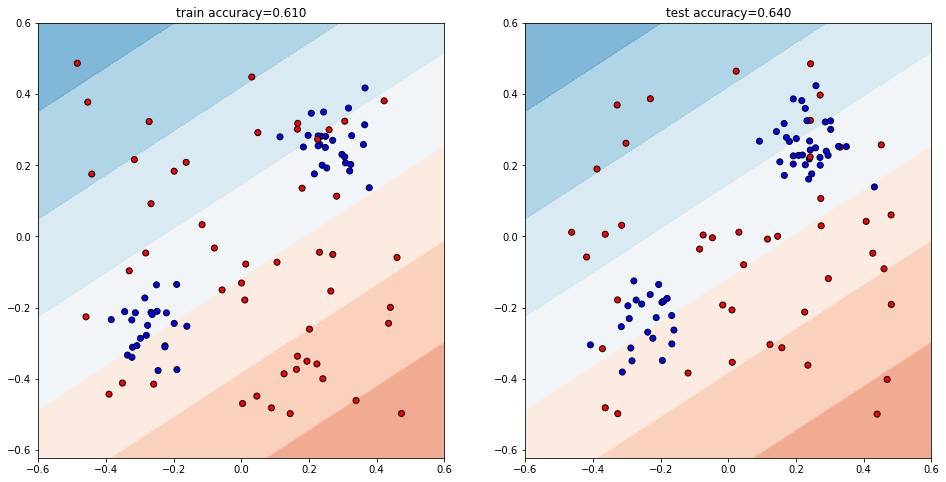

In [12]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Les données ne sont clairement pas linéairement séparable, il faut donc rajouter des couches au réseau de neurones pour 
pouvoir prédire plus efficacement

Ajoutez une couche cachée de taille 10 à votre réseau de neurones, avec la fonction d'activation relu.

Bonus: améliorez votre réseau de neurones: plus de neurones cachés, deuxième couche cachée etc.

In [14]:
# for the relu and the tanh function
import torch.nn.functional as F

# for reproductibility
torch.manual_seed(10)

n_in = 2
params = []
n_int1 = 10
n_int2 = 5
n_out = 1
W = Variable(torch.normal(torch.zeros(n_in, n_int1), np.sqrt(2/(n_in + 10))), requires_grad=True)
W1 = Variable(torch.normal(torch.zeros(n_int1, n_int2), np.sqrt(2/(n_in + 10))), requires_grad=True)
W2 = Variable(torch.normal(torch.zeros(n_int2, n_out), np.sqrt(2/(n_in + 10))), requires_grad=True)
b = Variable(torch.zeros(n_int1), requires_grad=True)
b1 = Variable(torch.zeros(n_int2), requires_grad=True)
b2 = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    H = F.relu(torch.add(torch.matmul(X, W), b))
    H = F.tanh(torch.add(torch.matmul(H, W1), b1))
    H = torch.sigmoid(torch.add(torch.matmul(H, W2), b2))
    return H




def L(H, Y, eps=1e-08):
    loss = -Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps)  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 100
# heard it's better to have a power of 2
train_batch_size = 8
alpha = 0.1


for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        
        Y_prob_mb = forward(X_mb)
        
        loss = torch.mean(L(Y_prob_mb, Y_mb))

        # Backward pass
        # TODO
        loss.backward()
        

        # Parameter update (gradient descent)
        # TODO
        
        W2.data.sub_(alpha * W2.grad.data)
        W2.grad.data.zero_()  # must reset to 0 before next pass

        b2.data.sub_(alpha * b2.grad.data)
        b2.grad.data.zero_()  # must reset to 0 before next pass
        
        W1.data.sub_(alpha * W1.grad.data)
        W1.grad.data.zero_()  # must reset to 0 before next pass
    
        b1.data.sub_(alpha * b1.grad.data)
        b1.grad.data.zero_() 
        
        W.data.sub_(alpha * W.grad.data)
        W.grad.data.zero_()  # must reset to 0 before next pass
    
        b.data.sub_(alpha * b.grad.data)
        b.grad.data.zero_()  # must reset to 0 before next pass
        
        train_loss += loss.data[0]
    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()


    print('Epoch {:03d}\ttrain loss={}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))

Epoch 001	train loss=0.6791808795928955	test loss=0.654109	0/1 error=0.410
Epoch 002	train loss=0.6437462222576141	test loss=0.615969	0/1 error=0.340
Epoch 003	train loss=0.581092374920845	test loss=0.551460	0/1 error=0.200
Epoch 004	train loss=0.4853826773166656	test loss=0.478820	0/1 error=0.130
Epoch 005	train loss=0.4499744768440723	test loss=0.456624	0/1 error=0.160
Epoch 006	train loss=0.38026746213436124	test loss=0.475275	0/1 error=0.220
Epoch 007	train loss=0.3660174483060837	test loss=0.437192	0/1 error=0.180
Epoch 008	train loss=0.3513558593392372	test loss=0.413412	0/1 error=0.150
Epoch 009	train loss=0.39949163250625136	test loss=0.419879	0/1 error=0.140
Epoch 010	train loss=0.3675985183566809	test loss=0.414279	0/1 error=0.170
Epoch 011	train loss=0.3431199511140585	test loss=0.386509	0/1 error=0.120
Epoch 012	train loss=0.34167041689157485	test loss=0.378836	0/1 error=0.140
Epoch 013	train loss=0.3695119308680296	test loss=0.374619	0/1 error=0.120
Epoch 014	train loss=0.

Epoch 111	train loss=0.13363380395108834	test loss=0.310643	0/1 error=0.080
Epoch 112	train loss=0.15273580674489495	test loss=0.326319	0/1 error=0.130
Epoch 113	train loss=0.14253655868116766	test loss=0.321831	0/1 error=0.130
Epoch 114	train loss=0.1281368637830019	test loss=0.331628	0/1 error=0.120
Epoch 115	train loss=0.12380752864526584	test loss=0.361856	0/1 error=0.090
Epoch 116	train loss=0.1605628964258358	test loss=0.368346	0/1 error=0.190
Epoch 117	train loss=0.13236953160492704	test loss=0.329784	0/1 error=0.120
Epoch 118	train loss=0.14345866640796884	test loss=0.344187	0/1 error=0.130
Epoch 119	train loss=0.1618262112129014	test loss=0.331832	0/1 error=0.130
Epoch 120	train loss=0.13060667955782265	test loss=0.356384	0/1 error=0.090
Epoch 121	train loss=0.13483218622393905	test loss=0.329307	0/1 error=0.110
Epoch 122	train loss=0.1550033458159305	test loss=0.334149	0/1 error=0.140
Epoch 123	train loss=0.1469569305740879	test loss=0.337528	0/1 error=0.130
Epoch 124	train l

Epoch 223	train loss=0.1214025632746052	test loss=0.392123	0/1 error=0.110
Epoch 224	train loss=0.12456713886465877	test loss=0.405504	0/1 error=0.100
Epoch 225	train loss=0.10438029262237251	test loss=0.393366	0/1 error=0.110
Epoch 226	train loss=0.10965917215828086	test loss=0.422048	0/1 error=0.130
Epoch 227	train loss=0.11415557035863458	test loss=0.432062	0/1 error=0.110
Epoch 228	train loss=0.1181194745664834	test loss=0.376925	0/1 error=0.140
Epoch 229	train loss=0.1075497197842924	test loss=0.430164	0/1 error=0.130
Epoch 230	train loss=0.11909415700240061	test loss=0.399953	0/1 error=0.170
Epoch 231	train loss=0.10586733921285486	test loss=0.414408	0/1 error=0.100
Epoch 232	train loss=0.13266021170216846	test loss=0.409742	0/1 error=0.130
Epoch 233	train loss=0.12983300693202182	test loss=0.394585	0/1 error=0.140
Epoch 234	train loss=0.12795470503915568	test loss=0.425765	0/1 error=0.110
Epoch 235	train loss=0.11822763384348946	test loss=0.431956	0/1 error=0.130
Epoch 236	train

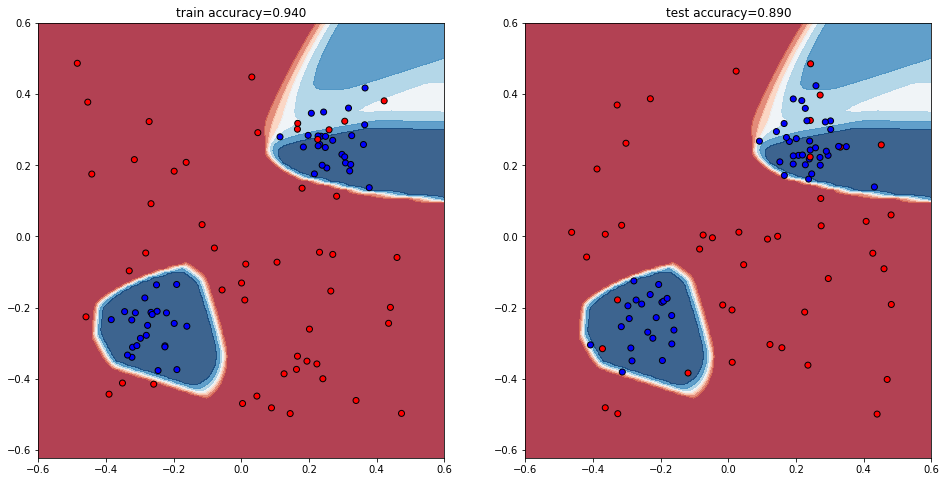

In [15]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

On voit que le reseau de neurone a bien mieux "appris" à différentier les deux catégories de points avec 2 couches cachés
de longueur 10 et 5 avec comme fonction d'activation relu puis tanh

# MNIST

Vous allez maintenant utiliser les fonctions haut niveau de pytorch: torch.nn, torch.optim etc.

On commence par charger les données:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms

mnist_folder = '~/M2DS/PGM/TP'

train_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=True)
test_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=False)

In [17]:
print("Nombre d'images dans le train set:", len(train_data))
print("Nombre d'images dans le test set:", len(test_data))

Nombre d'images dans le train set: 60000
Nombre d'images dans le test set: 10000


### Afficher quelques images

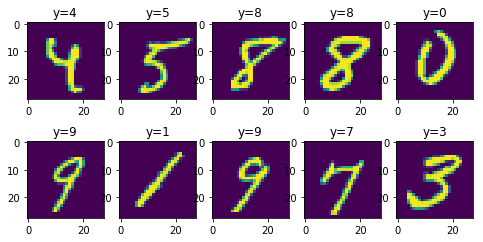

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 4), squeeze=False)
seed = 123 # changer la seed pour afficher d'autres images

for i in range(10):
    r = i // 5
    c = i % 5
    np.random.seed(seed+i)
    idx = np.random.choice(len(train_data), 1)[0]
    x = train_data[idx][0].numpy()
    y = train_data[idx][1]
    axes[r, c].imshow(x[0, :, :])
    axes[r, c].set_title('y={}'.format(y))
    
plt.show()

### Modèle initial

Jouez avec les paramètres suivants:
- lr
- epochs
- train_batch_size

Quelle est la meilleure performance (0/1 error) que vous arrivez à atteindre?

In [20]:
%%time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

# Training settings
seed = 138
test_batch_size = 100

test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

torch.manual_seed(seed)
np.random.seed(seed)



class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 10)

    def forward(self, X):
        X = X.view(-1, 28*28)  # flatten images
        X = self.fc1(X)
        return F.log_softmax(X, dim=1)

model = Net()
def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)

        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error

#Randomized search lr in [0,1] and epoch in [5, 30] done n times

all_mod = list()
n = 30
lrs = np.random.rand(n)
epochs_s = [np.random.randint(5,30) for _ in range(n)]
train_bs = [2**np.random.randint(4,10) for _ in range(n)]
for i, (lr, ep, bs) in enumerate(zip(lrs, epochs_s, train_bs)):
    model = Net()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    train_loader = DataLoader(train_data, batch_size=bs, shuffle=True)
    print('-'*50)
    print('training {} nb_epoch = {} lr = {} tbs = {}'.format(i + 1, ep, lr, bs))
    print('-'*50)
    for epoch in range(1, ep + 1):
        print('Epoch {}...'.format(epoch))
        train_loss = train(epoch)
        print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
        test_loss, test_error = test()
        print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))
    all_mod.append((lr, ep, bs, test_error))
print(all_mod)
best_param = min(all_mod, key=lambda x:x[3])
best_param

--------------------------------------------------
training 1 nb_epoch = 7 lr = 0.7493422613186888 tbs = 512
--------------------------------------------------
Epoch 1...
Train negative log-likelihood: 0.518544
Test  negative log-likelihood: 0.384713 0/1 error: 0.110500
Epoch 2...
Train negative log-likelihood: 0.341457
Test  negative log-likelihood: 0.320394 0/1 error: 0.087800
Epoch 3...
Train negative log-likelihood: 0.317248
Test  negative log-likelihood: 0.303977 0/1 error: 0.087200
Epoch 4...
Train negative log-likelihood: 0.305725
Test  negative log-likelihood: 0.304978 0/1 error: 0.086900
Epoch 5...
Train negative log-likelihood: 0.296932
Test  negative log-likelihood: 0.292424 0/1 error: 0.084300
Epoch 6...
Train negative log-likelihood: 0.291553
Test  negative log-likelihood: 0.288048 0/1 error: 0.078400
Epoch 7...
Train negative log-likelihood: 0.286951
Test  negative log-likelihood: 0.283224 0/1 error: 0.079700
--------------------------------------------------
training 2 n

Train negative log-likelihood: 0.555728
Test  negative log-likelihood: 0.480090 0/1 error: 0.117300
Epoch 3...
Train negative log-likelihood: 0.474880
Test  negative log-likelihood: 0.428440 0/1 error: 0.109100
Epoch 4...
Train negative log-likelihood: 0.435471
Test  negative log-likelihood: 0.400324 0/1 error: 0.103900
Epoch 5...
Train negative log-likelihood: 0.411060
Test  negative log-likelihood: 0.380956 0/1 error: 0.101400
Epoch 6...
Train negative log-likelihood: 0.393926
Test  negative log-likelihood: 0.366946 0/1 error: 0.096700
Epoch 7...
Train negative log-likelihood: 0.381280
Test  negative log-likelihood: 0.356572 0/1 error: 0.095200
Epoch 8...
Train negative log-likelihood: 0.371132
Test  negative log-likelihood: 0.348459 0/1 error: 0.093800
Epoch 9...
Train negative log-likelihood: 0.362968
Test  negative log-likelihood: 0.341521 0/1 error: 0.093000
Epoch 10...
Train negative log-likelihood: 0.356099
Test  negative log-likelihood: 0.336453 0/1 error: 0.090800
Epoch 11...

Train negative log-likelihood: 0.444284
Test  negative log-likelihood: 0.376783 0/1 error: 0.098600
Epoch 2...
Train negative log-likelihood: 0.394630
Test  negative log-likelihood: 0.379768 0/1 error: 0.102200
Epoch 3...
Train negative log-likelihood: 0.381613
Test  negative log-likelihood: 0.365242 0/1 error: 0.090800
Epoch 4...
Train negative log-likelihood: 0.376844
Test  negative log-likelihood: 0.386589 0/1 error: 0.093000
Epoch 5...
Train negative log-likelihood: 0.372710
Test  negative log-likelihood: 0.428812 0/1 error: 0.108000
--------------------------------------------------
training 11 nb_epoch = 7 lr = 0.3818385906356573 tbs = 64
--------------------------------------------------
Epoch 1...
Train negative log-likelihood: 0.380182
Test  negative log-likelihood: 0.304017 0/1 error: 0.087100
Epoch 2...
Train negative log-likelihood: 0.303808
Test  negative log-likelihood: 0.291964 0/1 error: 0.080200
Epoch 3...
Train negative log-likelihood: 0.290547
Test  negative log-like

Train negative log-likelihood: 0.567511
Test  negative log-likelihood: 0.488762 0/1 error: 0.119500
Epoch 3...
Train negative log-likelihood: 0.483344
Test  negative log-likelihood: 0.435774 0/1 error: 0.111100
Epoch 4...
Train negative log-likelihood: 0.442405
Test  negative log-likelihood: 0.406810 0/1 error: 0.105000
Epoch 5...
Train negative log-likelihood: 0.417075
Test  negative log-likelihood: 0.385833 0/1 error: 0.101700
Epoch 6...
Train negative log-likelihood: 0.399317
Test  negative log-likelihood: 0.371437 0/1 error: 0.098200
Epoch 7...
Train negative log-likelihood: 0.386081
Test  negative log-likelihood: 0.360908 0/1 error: 0.096300
Epoch 8...
Train negative log-likelihood: 0.375610
Test  negative log-likelihood: 0.352125 0/1 error: 0.095000
Epoch 9...
Train negative log-likelihood: 0.367112
Test  negative log-likelihood: 0.344957 0/1 error: 0.092900
Epoch 10...
Train negative log-likelihood: 0.360025
Test  negative log-likelihood: 0.339485 0/1 error: 0.092300
Epoch 11...

Train negative log-likelihood: 0.409820
Test  negative log-likelihood: 0.316516 0/1 error: 0.090900
Epoch 2...
Train negative log-likelihood: 0.308111
Test  negative log-likelihood: 0.294928 0/1 error: 0.085300
Epoch 3...
Train negative log-likelihood: 0.295485
Test  negative log-likelihood: 0.288779 0/1 error: 0.081300
Epoch 4...
Train negative log-likelihood: 0.287539
Test  negative log-likelihood: 0.281920 0/1 error: 0.078400
Epoch 5...
Train negative log-likelihood: 0.281546
Test  negative log-likelihood: 0.279028 0/1 error: 0.076700
Epoch 6...
Train negative log-likelihood: 0.278356
Test  negative log-likelihood: 0.284677 0/1 error: 0.079000
Epoch 7...
Train negative log-likelihood: 0.275211
Test  negative log-likelihood: 0.281674 0/1 error: 0.080700
Epoch 8...
Train negative log-likelihood: 0.273546
Test  negative log-likelihood: 0.274928 0/1 error: 0.077700
Epoch 9...
Train negative log-likelihood: 0.271838
Test  negative log-likelihood: 0.275721 0/1 error: 0.076900
Epoch 10...


Train negative log-likelihood: 0.811932
Test  negative log-likelihood: 0.500548 0/1 error: 0.119400
Epoch 2...
Train negative log-likelihood: 0.472505
Test  negative log-likelihood: 0.413024 0/1 error: 0.106500
Epoch 3...
Train negative log-likelihood: 0.415346
Test  negative log-likelihood: 0.378261 0/1 error: 0.100000
Epoch 4...
Train negative log-likelihood: 0.386919
Test  negative log-likelihood: 0.357997 0/1 error: 0.094700
Epoch 5...
Train negative log-likelihood: 0.368996
Test  negative log-likelihood: 0.343326 0/1 error: 0.093100
Epoch 6...
Train negative log-likelihood: 0.356240
Test  negative log-likelihood: 0.334083 0/1 error: 0.090400
Epoch 7...
Train negative log-likelihood: 0.346729
Test  negative log-likelihood: 0.326266 0/1 error: 0.089100
--------------------------------------------------
training 22 nb_epoch = 9 lr = 0.8675027797794868 tbs = 128
--------------------------------------------------
Epoch 1...
Train negative log-likelihood: 0.413503
Test  negative log-lik

Train negative log-likelihood: 0.312521
Test  negative log-likelihood: 0.300213 0/1 error: 0.082700
Epoch 20...
Train negative log-likelihood: 0.310533
Test  negative log-likelihood: 0.298527 0/1 error: 0.082500
Epoch 21...
Train negative log-likelihood: 0.308702
Test  negative log-likelihood: 0.296856 0/1 error: 0.082600
Epoch 22...
Train negative log-likelihood: 0.306844
Test  negative log-likelihood: 0.296113 0/1 error: 0.081700
Epoch 23...
Train negative log-likelihood: 0.305304
Test  negative log-likelihood: 0.294618 0/1 error: 0.081600
--------------------------------------------------
training 26 nb_epoch = 20 lr = 0.0342148884793938 tbs = 512
--------------------------------------------------
Epoch 1...
Train negative log-likelihood: 1.326001
Test  negative log-likelihood: 0.851926 0/1 error: 0.157300
Epoch 2...
Train negative log-likelihood: 0.751012
Test  negative log-likelihood: 0.633288 0/1 error: 0.134100
Epoch 3...
Train negative log-likelihood: 0.611789
Test  negative lo

Train negative log-likelihood: 0.268170
Test  negative log-likelihood: 0.304387 0/1 error: 0.087500
Epoch 17...
Train negative log-likelihood: 0.267111
Test  negative log-likelihood: 0.279032 0/1 error: 0.077400
--------------------------------------------------
training 30 nb_epoch = 16 lr = 0.8583409482207175 tbs = 32
--------------------------------------------------
Epoch 1...
Train negative log-likelihood: 0.445833
Test  negative log-likelihood: 0.369705 0/1 error: 0.099300
Epoch 2...
Train negative log-likelihood: 0.379343
Test  negative log-likelihood: 0.336228 0/1 error: 0.085900
Epoch 3...
Train negative log-likelihood: 0.364018
Test  negative log-likelihood: 0.373425 0/1 error: 0.098800
Epoch 4...
Train negative log-likelihood: 0.357218
Test  negative log-likelihood: 0.381009 0/1 error: 0.100500
Epoch 5...
Train negative log-likelihood: 0.349047
Test  negative log-likelihood: 0.368010 0/1 error: 0.096500
Epoch 6...
Train negative log-likelihood: 0.353802
Test  negative log-li

In [22]:
best_param

(0.88462399699719396, 14, 128, 0.0741)

Pour trouver une bonne combinaison de variables lr, epochs, et batch_train_size, on a effectué un randomized search où
-lr était un nombre réel compris entre 0 et 1
-epochs un nombre entier entre 5 et 30
-batch_train_size une puissance de 2 entre 16 et 1024

la meilleure combinaison trouvé après 30 itérations est:
lr = 0.88
epochs = 14
batch_train_size = 128
et l'erreur 0/1 est de 0.0741
(la valeur dans best_param)

## Améliorez votre modèle

Améliorez votre modèle afin de diminuer l'erreur sur le jeu de test. Essayez différentes architectures / hyperparamètres et à chaque fois reportez vos résultats.

Objectif: passer sous les 1% d'erreur: http://yann.lecun.com/exdb/mnist/

Pistes à essayer:
- plus de couches cachées
- convolutions + max pooling
- dropout
- couches résiduelles

Astuces:
- changer l'algorithme de descente de gradient (Adam)
- implémentez une stratégie d'early stopping: $n$ epochs sans amélioration -> arret
- implémentez une stratégie de diminution du learning rate: $n/2$ epochs sans amélioration -> $\alpha = \alpha / 2$ (torch.optim.lr_scheduler.ReduceLROnPlateau)

In [ ]:
%%time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

# Training settings
seed = 1337
lr = 0.1
epochs = 25
train_batch_size = 128
test_batch_size = 128

torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=5)
        self.conv1pool= nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        self.conv2pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(12*12*8, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1pool(self.conv1(X)))
        X = F.relu(self.conv2pool(self.conv2(X)))
        X = X.view(-1, 12*12*8)
        X = self.fc1(X)
        X = F.relu(self.fc1(X))
        X = F.sigmoid(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

model = Net()

#optimizer = optim.SGD(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error


optimizer = optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', verbose=True, patience=5, factor=.1)

#for epoch in range(1, epochs + 1):
epoch = 1
while optimizer.param_groups[0]['lr'] > .0001:
    train_loss = train(epoch)
    test_loss, test_error = test()
    scheduler.step(test_loss)
    if not epoch%10:
        print('Epoch {}...'.format(epoch))
        print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
        print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))
    epoch += 1
test_error

![title](romain.png)

## NLP: N-Gram Language Modeling

Modèle NGram: sachant les mots $n$ précédents on veut prédire le prochain mot:

\begin{equation*}
P(w_i | w_{i-1}, w_{i-2}, \dots, w_{i-n+1})
\end{equation*}

Où $w_i$ est le ième mot d'une phrase.

Veuillez considérer de modèle de prédiction de trigram suivant :

In [23]:
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}


class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_idxs = [word_to_ix[w] for w in context]
        context_var = Variable(torch.LongTensor(context_idxs))

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!

[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]


/home/romain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[
519.265869
[torch.FloatTensor of size 1]
, 
496.434723
[torch.FloatTensor of size 1]
, 
474.783295
[torch.FloatTensor of size 1]
, 
453.695496
[torch.FloatTensor of size 1]
, 
432.633789
[torch.FloatTensor of size 1]
, 
411.174225
[torch.FloatTensor of size 1]
, 
389.098511
[torch.FloatTensor of size 1]
, 
366.295532
[torch.FloatTensor of size 1]
, 
342.727997
[torch.FloatTensor of size 1]
, 
318.481110
[torch.FloatTensor of size 1]
, 
293.712769
[torch.FloatTensor of size 1]
, 
268.562164
[torch.FloatTensor of size 1]
, 
243.330093
[torch.FloatTensor of size 1]
, 
218.302551
[torch.FloatTensor of size 1]
, 
193.929810
[torch.FloatTensor of size 1]
, 
170.643112
[torch.FloatTensor of size 1]
, 
148.954330
[torch.FloatTensor of size 1]
, 
129.176086
[torch.FloatTensor of size 1]
, 
111.625328
[torch.FloatTensor of size 1]
, 
96.346771
[torch.FloatTensor of size 1]
, 
83.281807
[torch.FloatTensor of size 1]
, 
72.231537
[torch.FloatTensor of size 1]
, 
62.963078
[torch.FloatTensor of s

### Utilisez vos propres valeurs pour context

In [21]:
# context = # TODO
context = ['own', 'deep', 'lol']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

NameError: name 'word_to_ix' is not defined

## CBOW: Continuous Bag-of-Words
CBOW = Prédire un mot sachant les mots d'avant et les mots d'après.

Exercice : en utilisant l'exemple précédent, codez un modèle CBOW.

In [9]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    tensor = torch.LongTensor(idxs)
    return Variable(tensor)

CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
EMBEDDING_DIM = 10
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_to_ix = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print(data[:5])

class CBOW(nn.Module):

    def __init__(self):
        pass

    def forward(self, inputs):
        pass

[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]
